# Polytech SI3 - Données numériques: classification de sons
Diane Lingrand
2022-2023


In [ ]:
#chargement des librairies
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
import glob

In [ ]:
basedir="C:\\Users\\Michel K\\Desktop\\SI3\\Données numériques\\sounds\\"
# à adapter 
#attention, sous windows, il faut changer en "C:\\Users\\monNom\\monCoursPrefere\\"
classes = ["cat","dog","bird"]
nbClasses = len(classes)

for cl in classes:
    listSons = glob.glob(basedir+cl+"\\*.wav")
    print(cl,len(listSons))

## algorithme kNN

In [ ]:
#knn algo
def voteKnn(xtrain, ytrain, nKnn, newData):
    d = np.sqrt(np.sum((xtrain - newData)**2, axis=1))
    r = np.argsort(d)
    # nKNN smallest distances indices
    nei1 = r[0:nKnn]

    # nKNN closest data
    Xn1 = []
    yn1 = []
    for j in nei1:
        Xn1.append(xtrain[j])
        yn1.append(ytrain[j])

    cl, co = np.unique(yn1, return_counts=True)
    nbOfMC = np.count_nonzero(co == np.max(co))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
    if nbOfMC > 1:
        classe1 = voteKnn(xtrain, ytrain, nKnn - 1, newData)
    else:
        maxOccIndex1 = np.argmax(co)  # renvoie l'indice de l'occurrence la plus élevée
        classe1 = cl[
            maxOccIndex1]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
    return classe1

## Représentation des sons par 1 MFCC

In [ ]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)
        Xtrain[i] = mfcc_feat.reshape(13)
        i += 1
    yTrain += [clNumber]*nb
    clNumber += 1

yTrain = np.array(yTrain)

In [ ]:
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)
        Xtest[i] = mfcc_feat.reshape(13)
        i += 1
    yTest += [clNumber]*nb
    clNumber += 1

yTest = np.array(yTest)

## Représentation des sons par la moyenne des MFCCs (longueur standard)

In [ ]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtrain[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTrain += [clNumber]*nb
    clNumber += 1

yTrain = np.array(yTrain)

In [ ]:
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtest[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTest += [clNumber]*nb
    clNumber += 1

yTest = np.array(yTest)

## Classification par kNN

**Question 1**: Pour chaque représentation des fichiers sons, calculez les prédictions d'une classification par kNN. Pour cela, il faudra tester plusieurs valeurs de k.

### Prédiction pour une représentation des sons avec 1 MFCC

#### Représentation des sons par 1 MFCC

In [ ]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain2 = []
Xtrain2 = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)
        Xtrain2[i] = mfcc_feat.reshape(13)
        i += 1
    yTrain2 += [clNumber]*nb
    clNumber += 1

yTrain2 = np.array(yTrain2)

In [ ]:
## loading test dataset
i = 0
clNumber = 0
yTest2 = []
Xtest2 = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)
        Xtest2[i] = mfcc_feat.reshape(13)
        i += 1
    yTest2 += [clNumber]*nb
    clNumber += 1

yTest2 = np.array(yTest2)

In [ ]:
numberNN = 5

In [ ]:
#predictions
predTrain = [voteKnn(Xtrain2, yTrain2, numberNN, i) for i in Xtrain2]
predTest =  [voteKnn(Xtest2, yTest2, numberNN, i) for i in Xtest2] # Peut-être qu'il serait plus intelligent de mettre Xtrain et yTrain ici

### Prédiction pour une représentation des sons avec la moyenne des MFCC

#### Représentation des sons par la moyenne des MFCCs (longueur standard)

In [155]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtrain[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTrain += [clNumber]*nb
    clNumber += 1

yTrain = np.array(yTrain)

In [156]:
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtest[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTest += [clNumber]*nb
    clNumber += 1

yTest = np.array(yTest)

In [157]:
numberNN = 1

In [158]:
#predictions
predTrain = [voteKnn(Xtrain, yTrain, numberNN, i) for i in Xtrain]
predTest =  [voteKnn(Xtest, yTest, numberNN, i) for i in Xtest] # Peut-être qu'il serait plus intelligent de mettre Xtrain et yTrain ici

**Question 2**: Calculez les matrices de confusion, les métriques de précision 'accuracy' et de score F1 pour les données d'apprentissage et de test. Pour cela, écrire 3 fonctions: <ul> <li> une fonction qui affiche une matrice de confusion</li> <li>une fonction qui calcule la précision (accuracy)</li><li>une fonction qui calcule le score F1 d'une classe</li></ul>

In [159]:
#ici
# Calcul matrice de confusion

def confusion_matrix_calculation(Ydata, predData):
    if len(Ydata) != len(predData): exit(1)
    classes = np.unique(Ydata)
    nb_classes = len(classes)
    matrix = [[0 for i2 in range(nb_classes)] for i3 in range(nb_classes)] # feat Nicolas Zanin
    for c in classes:
        for d, c2 in zip(Ydata, range(0, len(Ydata))):
            if d == c:
                matrix[c][predData[c2]] += 1
    return matrix

# Affichage matrice de confusion
def print_confusion_matrix(matrix):
    for i2 in matrix:
        print(i2)

print(predTrain)
print(yTrain)
print_confusion_matrix(confusion_matrix_calculation(yTrain, predTrain))
#cpt = 0
#for i, j in zip(yTrain, predTrain):
#    if i==j and i == 1:
#        cpt+=1
#print(cpt)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [172]:
def get_vp_vn_fp_fn(matrice):
    if len(matrice) != 3 and len(matrice[0]) != 3: exit(1)
    VP = 0 # vrais positifs
    VN = 0 # vrais négatifs
    FP = 0 # faux positifs
    FN = 0 # faux négatifs
    classe_courante = 0
    for i in range(0, len(matrice)):
        for j in range(0, len(matrice[0])):
            if i == j:
                VP += matrice[i][j]
            else:
                FN += matrice[i][j]
                FP += matrice[j][i]
        for i2 in range(0, len(matrice)):
            for j2 in range(0, len(matrice)):
                if i2 != classe_courante and j2 != classe_courante:
                        VN += matrice[i2][j2]
        classe_courante+=1
    return VP, VN, FP, FN

#Calcul de la précision (accuracy)
def calculation_accuracy(matrice):
    vp, vn, fp, fn = get_vp_vn_fp_fn(matrice)
    return (vp + vn)/(vp + vn + fp + fn)

matrice = confusion_matrix_calculation(yTrain, predTrain)
precision = calculation_accuracy(matrice)
print(precision)

1.0


In [166]:
def get_vp_vn_fp_fn(matrice):
    if len(matrice) != len(matrice[0]): exit(1)
    VP = 0 # vrais positifs
    VN = 0 # vrais négatifs
    FP = 0 # faux positifs
    FN = 0 # faux négatifs
    classe_courante = 0
    for i in range(0, len(matrice)):
        for j in range(0, len(matrice[0])):
            if i == j:
                VP += matrice[i][j]
            FP += matrice[i][j]
            FN += matrice[j][i]
            for i2 in range(0, len(matrice)):
                for j2 in range(0, len(matrice)):
                    if i2 != classe_courante and j2 != classe_courante:
                        VN += matrice[i2][j2]
            classe_courante+=1
    return VP, FP, VN, FN

#Calcul du score F1 d'une classe
def calcul_f1(matrice):
    vp, fp, vn, fn = get_vp_vn_fp_fn(matrice)
    return (2*vp)/((2*vp) + fp + fn)

matrice = confusion_matrix_calculation(yTrain, predTrain)
score_f1 = calcul_f1(matrice)
print(score_f1)

0.5


**Question 3:** Affichez la courbe de la précision (accuracy) en fonction du k de kNN pour les données d'apprentissage et pour les données de test.

1 MFCC

In [167]:
# loading train dataset

nb = 200  # for each class
i = 0
clNumber = 0
yTrain2 = []
Xtrain2 = np.empty(shape=(nb * nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir + cl + "/*.wav")
    for s in listSons[:nb]:
        (sig, rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13, hop_length=len(sig) + 1)
        Xtrain2[i] = mfcc_feat.reshape(13)
        i += 1
    yTrain2 += [clNumber] * nb
    clNumber += 1

yTrain2 = np.array(yTrain2)

## loading test dataset
i = 0
clNumber = 0
yTest2 = []
Xtest2 = np.empty(shape=(nb * nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir + cl + "/*.wav")
    for s in listSons[-nb:]:
        #print("###",s,"###")
        (sig, rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13, hop_length=len(sig) + 1)
        Xtest2[i] = mfcc_feat.reshape(13)
        i += 1
    yTest2 += [clNumber] * nb
    clNumber += 1

yTest2 = np.array(yTest2)

Moyenne des MFCC

In [168]:
# loading train dataset
nb = 200  # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb * nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir + cl + "/*.wav")
    for s in listSons[:nb]:
        (sig, rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13)
        Xtrain[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTrain += [clNumber] * nb
    clNumber += 1

yTrain = np.array(yTrain)
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb * nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir + cl + "/*.wav")
    for s in listSons[-nb:]:
        #print("###",s,"###")
        (sig, rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13)
        Xtest[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTest += [clNumber] * nb
    clNumber += 1

yTest = np.array(yTest)

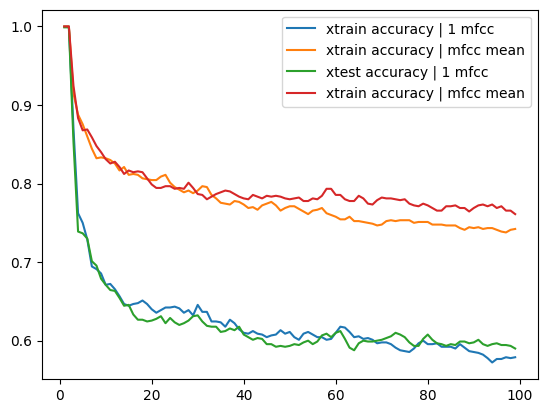

In [174]:
#ici
Y = []
Y2 = []
Y3 = []
Y4 = []
F1 = []
F1bis = []
min_knn_value = 1
max_knn_value = 100
for j in range(min_knn_value, max_knn_value):
    matriceTrain2 = confusion_matrix_calculation(yTrain2, [voteKnn(Xtrain2, yTrain2, j, i) for i in Xtrain2])
    matriceTest2 = confusion_matrix_calculation(yTest2, [voteKnn(Xtest2, yTest2, j, i) for i in Xtest2])
    matriceTrain = confusion_matrix_calculation(yTrain, [voteKnn(Xtrain, yTrain, j, i) for i in Xtrain])
    matriceTest = confusion_matrix_calculation(yTest, [voteKnn(Xtest, yTest, j, i) for i in Xtest])
    Y.append(calculation_accuracy(matriceTrain2))
    Y3.append(calculation_accuracy(matriceTrain))
    #F1.append(calcul_f1(matriceTrain2))
    Y2.append(calculation_accuracy(matriceTest2))
    Y4.append(calculation_accuracy(matriceTest))
    #F1bis.append(calcul_f1(matriceTest2))
X = [i for i in range(min_knn_value, max_knn_value)]
#fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
#ax1.set_xlim(min_knn_value, max_knn_value)
#ax1.set_ylim(0.3, 1)
plt.plot(X,Y, label = "xtrain accuracy | 1 mfcc")
plt.plot(X,Y3, label = "xtrain accuracy | mfcc mean")
#ax1.plot(X, F1, label = "xtrain f1-score")
#ax2.set_xlim(min_knn_value, max_knn_value)
#ax2.set_ylim(0, 1)
plt.plot(X, Y2, label = "xtest accuracy | 1 mfcc")
plt.plot(X,Y4, label = "xtrain accuracy | mfcc mean")
#plt.ylim(0.5, 1)
#ax2.plot(X, F1bis, label = "xtest f1-score")
plt.legend()
plt.show()

**Question 4:** Parmi les 2 représentations proposées, laquelle vous parait la meilleure?

In [ ]:
#ici